## Tutorial on REPOP -- REconstruct POpulations from Plates

This tutorial provides a step-by-step guide on using the `repop` software package. 


The package processes sequences of counts and dilution factors obtained through plate counting to reconstruct population distributions.
For installation and setup, please refer to the repository README.

In [1]:
import torch
import repop
import pandas as pd
from matplotlib import pyplot as plt

## Model 1 — Unimodal and Without Threshold

### Main Usage
First, we need to retrieve the count data and corresponding dilution factors.

For this tutorial, we will use a synthetic dataset (`synth_unimodal`) containing 1,000 data points.

For details on generating synthetic data, refer to the repository README. 
For now, let's load the data using `pandas`.



In [2]:
filename = 'synth_data/synth_unimodal.csv'
df=pd.read_csv(filename)[:1000]
df

,Counts,Dilution
0,32,200
1,39,200
2,42,200
3,46,200
4,48,200
...,...,...
995,46,200
996,38,200
997,34,200
998,32,200


### Extracting Counts and Dilution Factors
To ensure `repop` correctly associates dilution factors with counts, we must preserve their order.

Below, we extract both as `numpy` arrays and display the first five elements of each:

In [3]:
cts  = df['Counts'].to_numpy()
dils = df['Dilution'].to_numpy().astype(float)
cts[:5],dils[:5]

(array([32, 39, 42, 46, 48]), array([200., 200., 200., 200., 200.]))

### Creating a Dataset Object
To use `repop`, we first initialize a `dataset` object with the extracted counts and dilution factors.

In [4]:
data = repop.dataset(cts,dils)

### Reconstructing the Distribution
To reconstruct the population distribution, we use the `evaluate` function.

Since we know that our synthetic dataset represents a unimodal distribution, we set `components=1`. (We will explore multimodal cases later.)

In our benchmark, this process took approximately 10 s.

In [5]:
data.evaluate(components=1)

(tensor([7943.7106], device='cuda:0', dtype=torch.float64),
 tensor([529.6136], device='cuda:0', dtype=torch.float64),
 tensor([1.], device='cuda:0', dtype=torch.float64))

The printed output corresponds to:
- **Means**: The estimated center of the Gaussian component.
- **Standard Deviations**: The spread of the distribution.
- **Weights**: The proportion of each component in the mixture.


Since we are using a single-component model (`components=1`), we obtain one value for each parameter.  
For multimodal distributions, these parameters will be arrays, with weights summing to 1.


### Visualizing the Reconstruction
Once `data.evaluate()` is executed, we can visualize the reconstructed population distribution using `make_plot`:


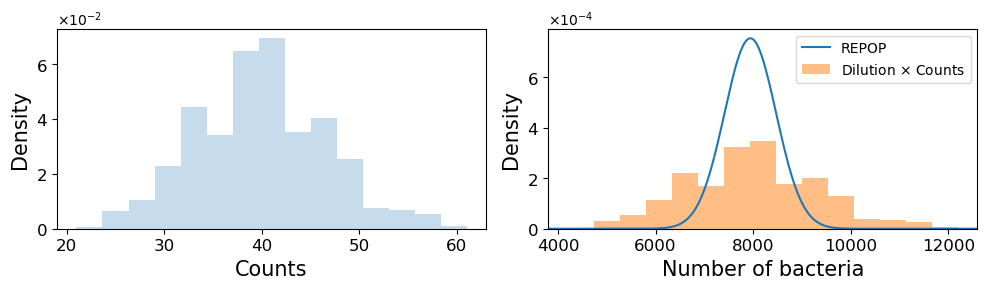

In [6]:
data.make_plot('graphs/synth/unimodal.png')
plt.show()

### Comparing to Ground Truth
Since this dataset is synthetic, we know it was generated using a single Gaussian with mean $8000$ and standard deviation $500$.

The estimated values from our model are very close to these ground truth parameters (see output in line 5).  
To visualize the difference between the estimated and true distribution on the same plot, we can use the `set_gt` function and pass it as a parameter in `make_plot`, as shown below:


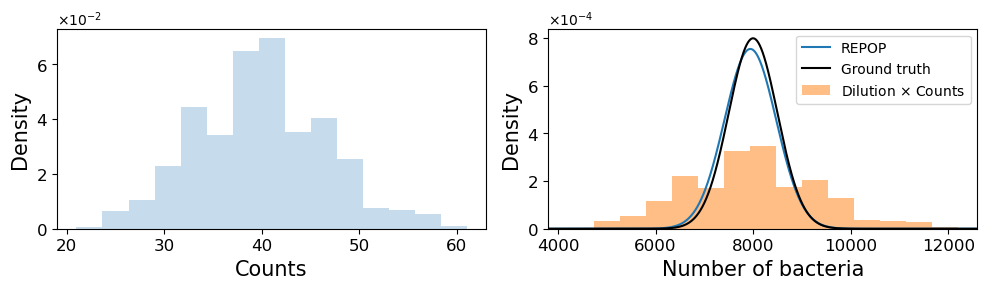

In [7]:
gt = repop.set_gt(8000,500,1)
data.make_plot('graphs/synth/unimodal.png',gt)
plt.show()

### Extracting the Reconstructed Probability Density Function

Here, it is interesting to mention that in `repop` we can also obtain the reconstructed probability density function (PDF) in terms of bacterial counts. This allows us to save the results for further applications.
To do this, we use the function `get_reconstruction`, which returns `n, p` as an array. This output can be used independently outside the `data` object.
For visualization, let's plot the reconstructed distribution separately, without relying on the `data` object.


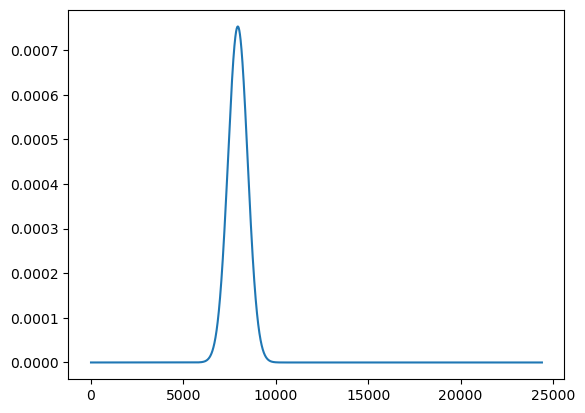

In [8]:
n,p = data.get_reconstruction()
plt.plot(n,p)
plt.show()

While this graph is not as insightfull. The fact that we extract `n` and `p` are useful as they can be saved and used in other applications for further analysis or integration into different workflows.

## Model 2 - Multimodal and without threshold

In [9]:
filename = 'synth_data/synth_multimodal_harder.csv'
df   = pd.read_csv(filename)[:1000]
cts  = df['Counts'].to_numpy()
dils = df['Dilution'].to_numpy().astype(float)

In [10]:
data2 = repop.dataset(cts,dils)

In [11]:
gt2 = repop.set_gt((4000,8000,14000),(200,1500,1000),(.25,.4,.35))

In [12]:
data2.evaluate()

(tensor([14059.3577, 14043.5783,  3976.5510,  7981.5001,  3985.9396,  7957.3844,
          7933.7066, 13677.9381,  7813.8701, 11355.3173,  7620.6154, 10543.7393,
         10358.5741,  4037.4648,  4039.7593,  6778.7086,  4029.0558,  4009.7388,
          3977.3548,  3934.8518,  4956.8177,  4987.5699,  4865.2191],
        device='cuda:0', dtype=torch.float64),
 tensor([ 898.1102,  956.3943,  378.6279,  887.7174,  415.6050, 1025.6121,
         1121.7480, 1802.4719, 1433.2988, 2886.5604, 1646.7968, 2880.3628,
         2881.2398,  650.9857,  685.7807, 1749.7673,  757.6786,  792.4565,
          824.7411,  857.0253, 1412.3024, 1479.9734, 1497.7183],
        device='cuda:0', dtype=torch.float64),
 tensor([0.1311, 0.1169, 0.0887, 0.0853, 0.0706, 0.0675, 0.0598, 0.0562, 0.0467,
         0.0422, 0.0364, 0.0329, 0.0291, 0.0236, 0.0206, 0.0191, 0.0157, 0.0136,
         0.0117, 0.0100, 0.0087, 0.0074, 0.0062], device='cuda:0',
        dtype=torch.float64))

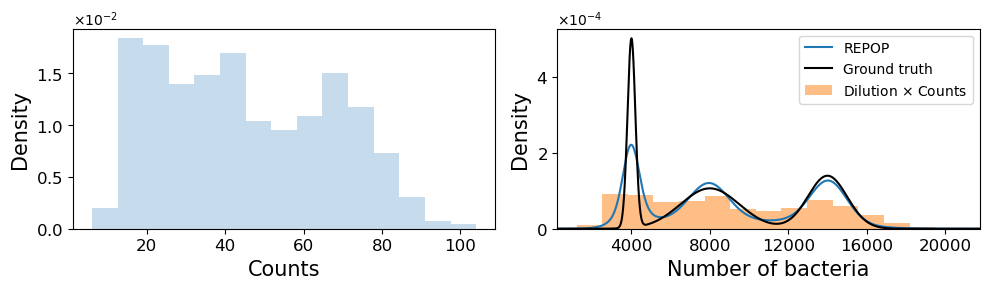

In [14]:
data2.make_plot('graphs/synth/multimodal_harder.png',gt2)
plt.show()